In [ ]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55744 (217.75 KB)
Trainable params: 5574

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)              

In [ ]:
# Train the MNIST dataset
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 54s 57ms/step - loss: 0.1767 - accuracy: 0.9445
Epoch 2/5
938/938 [==============================] - 46s 49ms/step - loss: 0.0463 - accuracy: 0.9859
Epoch 3/5
938/938 [==============================] - 44s 47ms/step - loss: 0.0326 - accuracy: 0.9894
Epoch 4/5
938/938 [==============================] - 45s 48ms/step - loss: 0.0244 - accuracy: 0.9926
Epoch 5/5
938/938 [==============================] - 48s 51ms/step - loss: 0.0196 - accuracy: 0.9940


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

313/313 [==============================] - 5s 16ms/step - loss: 0.0264 - accuracy: 0.9927
0.9926999807357788


In [ ]:
model_no_max_pool = models.Sequential()
model_no_max_pool.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(28, 28, 1)))
model_no_max_pool.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_no_max_pool.add(layers.Conv2D(64, (3, 3), activation='relu'))

model_no_max_pool.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_8 (Conv2D)           (None, 22, 22, 64)        36928     
                                                                 
Total params: 55744 (217.75 KB)
Trainable params: 55744 (217.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
!pip install kaggle


In [ ]:
%cd "/content/drive/MyDrive/Colab Notebooks/cat-dog"

/content/drive/MyDrive/Colab Notebooks/cat-dog


In [ ]:
import os
from kaggle.api.kaggle_api_extended import KaggleApi

# Set your Kaggle API credentials
os.environ["KAGGLE_USERNAME"] = "sherazraza"
os.environ["KAGGLE_KEY"] = "49c403b223f1ea0f2d79a4d6695b5349"

# Initialize Kaggle API
api = KaggleApi()
api.authenticate()

# Download dataset for Dogs vs. Cats competition
competition_name = "dogs-vs-cats"
api.competition_download_files(competition_name, path="./")


In [ ]:
!unzip "/content/drive/MyDrive/Colab Notebooks/cat-dog/dogs-vs-cats.zip"

Archive:  /content/drive/MyDrive/Colab Notebooks/cat-dog/dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               


In [ ]:
%cd "/content/drive/MyDrive/Colab Notebooks/cat-dog/test"
!unzip "/content/drive/MyDrive/Colab Notebooks/cat-dog/test1.zip"
%cd "/content/drive/MyDrive/Colab Notebooks/cat-dog/train"
!unzip "/content/drive/MyDrive/Colab Notebooks/cat-dog/train.zip"
%cd ..

Streaming output truncated to the last 5000 lines.
  inflating: train/dog.55.jpg        
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/dog.552.jpg       
  inflating: train/dog.5520.jpg      

In [ ]:
import os
import shutil

# Define paths
original_dataset_dir = '/content/drive/MyDrive/Colab Notebooks/cat-dog'
base_dir = '/content/drive/MyDrive/Colab Notebooks/test'
if not os.path.exists(base_dir):
    os.mkdir(base_dir)


train_dir = os.path.join(base_dir, 'train')
if not os.path.exists(train_dir):
  os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
if not os.path.exists(validation_dir):
  os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
if not os.path.exists(test_dir):
  os.mkdir(test_dir)

# Function to copy images
def copy_images(source_dir, dest_dir, fnames):
    for fname in fnames:
        src = os.path.join(source_dir, fname)
        dst = os.path.join(dest_dir, fname)
        shutil.copyfile(src, dst)

# Move images for training set
train_cats_dir = os.path.join(train_dir, 'cats')
if not os.path.exists(train_cats_dir):

  os.mkdir(train_cats_dir)
copy_images(os.path.join(original_dataset_dir, 'train', 'train1'), train_cats_dir, os.listdir(os.path.join(original_dataset_dir, 'train', 'train1')))

train_dogs_dir = os.path.join(train_dir, 'dogs')
if not os.path.exists(train_dogs_dir):

  os.mkdir(train_dogs_dir)
copy_images(os.path.join(original_dataset_dir, 'train', 'train1'), train_dogs_dir, os.listdir(os.path.join(original_dataset_dir, 'train', 'train1')))

# Move images for validation set
validation_cats_dir = os.path.join(validation_dir, 'cats')
if not os.path.exists(validation_cats_dir):

  os.mkdir(validation_cats_dir)
copy_images(os.path.join(original_dataset_dir, 'train', 'train1'), validation_cats_dir, os.listdir(os.path.join(original_dataset_dir, 'train', 'train1')))

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
if not os.path.exists(validation_dogs_dir):

  os.mkdir(validation_dogs_dir)
copy_images(os.path.join(original_dataset_dir, 'train', 'train1'), validation_dogs_dir, os.listdir(os.path.join(original_dataset_dir, 'train', 'train1')))

# Move images for test set
test_cats_dir = os.path.join(test_dir, 'cats')
if not os.path.exists(test_cats_dir):

  os.mkdir(test_cats_dir)
copy_images(os.path.join(original_dataset_dir, 'test', 'test1'), test_cats_dir, os.listdir(os.path.join(original_dataset_dir, 'test', 'test1')))

test_dogs_dir = os.path.join(test_dir, 'dogs')
if not os.path.exists(test_dogs_dir):

  os.mkdir(test_dogs_dir)
copy_images(os.path.join(original_dataset_dir, 'test', 'test1'), test_dogs_dir, os.listdir(os.path.join(original_dataset_dir, 'test', 'test1')))


# Move images for validation set (dogs)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
if not os.path.exists(validation_dogs_dir):
    os.mkdir(validation_dogs_dir)
copy_images(os.path.join(original_dataset_dir, 'train', 'train1'), validation_dogs_dir, os.listdir(os.path.join(original_dataset_dir, 'train', 'train1')))

# Move images for test set (dogs)
test_dogs_dir = os.path.join(test_dir, 'dogs')
if not os.path.exists(test_dogs_dir):
    os.mkdir(test_dogs_dir)
copy_images(os.path.join(original_dataset_dir, 'test', 'test1'), test_dogs_dir, os.listdir(os.path.join(original_dataset_dir, 'test', 'test1')))




FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/test/train/cats/cat.10226.jpg'

In [ ]:
# Define paths
original_dataset_dir = '/content/drive/MyDrive/Colab Notebooks/cat-dog'
base_dir = '/content/drive/MyDrive/Colab Notebooks/test'
if not os.path.exists(base_dir):
    os.mkdir(base_dir)

# Function to copy images
def copy_images(source_dir, dest_dir, fnames):
    for fname in fnames:
        src = os.path.join(source_dir, fname)
        dst = os.path.join(dest_dir, fname)
        shutil.copyfile(src, dst)

# Move images for validation set (dogs)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
if not os.path.exists(validation_dogs_dir):
    os.mkdir(validation_dogs_dir)
copy_images(os.path.join(original_dataset_dir, 'train', 'train2'), validation_dogs_dir, os.listdir(os.path.join(original_dataset_dir, 'train', 'train2')))

# Move images for test set (dogs)
test_dogs_dir = os.path.join(test_dir, 'dogs')
if not os.path.exists(test_dogs_dir):
    os.mkdir(test_dogs_dir)
copy_images(os.path.join(original_dataset_dir, 'test', 'test1'), test_dogs_dir, os.listdir(os.path.join(original_dataset_dir, 'test', 'test1')))




In [ ]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2))
)
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

from keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,target_size=(150, 150),
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

In [ ]:
for data_batch, labels_batch in train_generator:
print('data batch shape:', data_batch.shape)
print('labels batch shape:', labels_batch.shape)
break

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

In [ ]:
model.save('cats_and_dogs_small_1.h5')


In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
# Setting up a data augmentation configuration via ImageDataGenerator

datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

In [ ]:
from keras.preprocessing import image
fnames = [os.path.join(train_cats_dir, fname) for
fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)



In [ ]:
model.save('cats_and_dogs_small_2.h5')


One hot encoding


In [ ]:
import numpy as np
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
token_index = {}
for sample in samples:
    for word in sample.split():
        if word not in token_index:
            token_index[word] = len(token_index) + 1
max_length = 10
results = np.zeros(shape=(len(samples),
                    max_length,
                    max(token_index.values()) + 1))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = token_index.get(word)
        results[i, j, index] = 1.

In [ ]:
print(token_index)

{'The': 1, 'cat': 2, 'sat': 3, 'on': 4, 'the': 5, 'mat.': 6, 'dog': 7, 'ate': 8, 'my': 9, 'homework.': 10}


In [ ]:
print(results)

[[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]]


In [ ]:
!unzip "/content/drive/MyDrive/aclImdb.zip"

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/aclImdb/train/pos/._7754_9.txt  
  inflating: aclImdb/train/pos/7755_9.txt  
  inflating: __MACOSX/aclImdb/train/pos/._7755_9.txt  
  inflating: aclImdb/train/pos/7756_10.txt  
  inflating: __MACOSX/aclImdb/train/pos/._7756_10.txt  
  inflating: aclImdb/train/pos/7757_9.txt  
  inflating: __MACOSX/aclImdb/train/pos/._7757_9.txt  
  inflating: aclImdb/train/pos/7758_7.txt  
  inflating: __MACOSX/aclImdb/train/pos/._7758_7.txt  
  inflating: aclImdb/train/pos/7759_10.txt  
  inflating: __MACOSX/aclImdb/train/pos/._7759_10.txt  
  inflating: aclImdb/train/pos/775_7.txt  
  inflating: __MACOSX/aclImdb/train/pos/._775_7.txt  
  inflating: aclImdb/train/pos/7760_10.txt  
  inflating: __MACOSX/aclImdb/train/pos/._7760_10.txt  
  inflating: aclImdb/train/pos/7761_10.txt  
  inflating: __MACOSX/aclImdb/train/pos/._7761_10.txt  
  inflating: aclImdb/train/pos/7762_8.txt  
  inflating: __MACOSX/aclImdb/train/pos/._7762_8.txt

In [ ]:
import os
imdb_dir = '/content/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')
labels = []
texts = []
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
maxlen = 100
training_samples = 200
validation_samples = 10000
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
data = pad_sequences(sequences, maxlen=maxlen)
labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]



Found 88582 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


In [ ]:
!wget "https://nlp.stanford.edu/data/glove.6B.zip"

--2024-05-25 10:00:19--  https://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-05-25 10:00:19--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  5.01MB/s    in 2m 39s  

2024-05-25 10:02:58 (5.17 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]



In [ ]:
!unzip "/content/glove.6B.zip"

Archive:  /content/glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [ ]:
import os
glove_dir = '/content/'
embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [ ]:
embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          1000000   
                                                                 
 flatten (Flatten)           (None, 10000)             0         
                                                                 
 dense (Dense)               (None, 32)                320032    
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1320065 (5.04 MB)
Trainable params: 1320065 (5.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#  Loading pretrained word embeddings into the Embedding layer
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

Epoch 1/10
7/7 [==============================] - 4s 283ms/step - loss: 1.8936 - acc: 0.4900 - val_loss: 0.6988 - val_acc: 0.5264
Epoch 2/10
7/7 [==============================] - 1s 227ms/step - loss: 0.5180 - acc: 0.7800 - val_loss: 0.7955 - val_acc: 0.5091
Epoch 3/10
7/7 [==============================] - 1s 115ms/step - loss: 0.4537 - acc: 0.7950 - val_loss: 0.7870 - val_acc: 0.5040
Epoch 4/10
7/7 [==============================] - 1s 114ms/step - loss: 0.2240 - acc: 0.9650 - val_loss: 0.7374 - val_acc: 0.5294
Epoch 5/10
7/7 [==============================] - 1s 108ms/step - loss: 0.2779 - acc: 0.8700 - val_loss: 0.7807 - val_acc: 0.5290
Epoch 6/10
7/7 [==============================] - 1s 114ms/step - loss: 0.1429 - acc: 0.9750 - val_loss: 0.7431 - val_acc: 0.5443
Epoch 7/10
7/7 [==============================] - 1s 115ms/step - loss: 0.0802 - acc: 0.9950 - val_loss: 0.8949 - val_acc: 0.5209
Epoch 8/10
7/7 [==============================] - 1s 110ms/step - loss: 0.1010 - acc: 0.96

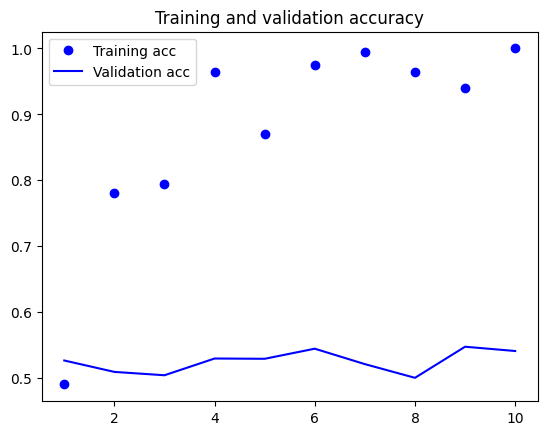

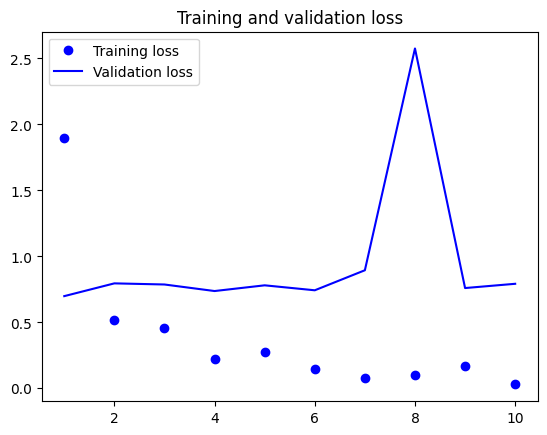

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
#RNN

import numpy as np
timesteps = 100
input_features = 32
output_features = 64
inputs = np.random.random((timesteps, input_features))
state_t = np.zeros((output_features,))
W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))
successive_outputs = []
for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    successive_outputs.append(output_t)
    state_t = output_t
final_output_sequence = np.concatenate(successive_outputs, axis=0)

In [ ]:
from keras.datasets import imdb
from keras.preprocessing import sequence
max_features = 10000
maxlen = 500
batch_size = 32
print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(
num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
17464789/17464789 [==============================] - 0s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [ ]:
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, SimpleRNN

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 30s 183ms/step - loss: 0.6797 - acc: 0.5602 - val_loss: 0.6562 - val_acc: 0.6066
Epoch 2/10
157/157 [==============================] - 27s 172ms/step - loss: 0.5214 - acc: 0.7452 - val_loss: 0.5046 - val_acc: 0.7556
Epoch 3/10
157/157 [==============================] - 24s 151ms/step - loss: 0.3495 - acc: 0.8530 - val_loss: 0.4546 - val_acc: 0.7896
Epoch 4/10
157/157 [==============================] - 27s 172ms/step - loss: 0.2558 - acc: 0.8982 - val_loss: 0.4808 - val_acc: 0.7696
Epoch 5/10
157/157 [==============================] - 26s 165ms/step - loss: 0.1871 - acc: 0.9320 - val_loss: 0.4655 - val_acc: 0.8056
Epoch 6/10
157/157 [==============================] - 27s 174ms/step - loss: 0.1519 - acc: 0.9443 - val_loss: 0.6139 - val_acc: 0.8050
Epoch 7/10
157/157 [==============================] - 25s 159ms/step - loss: 0.0834 - acc: 0.9734 - val_loss: 0.6101 - val_acc: 0.7728
Epoch 8/10
157/157 [==============================] - 2

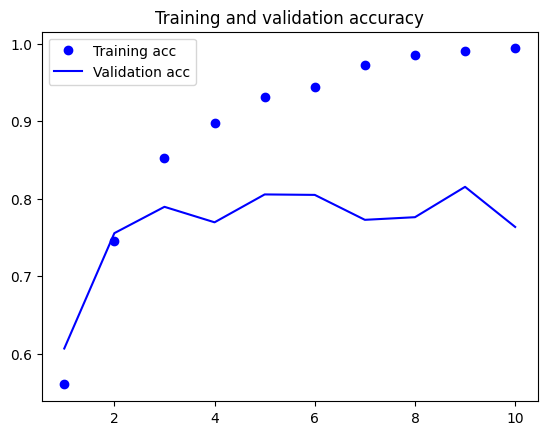

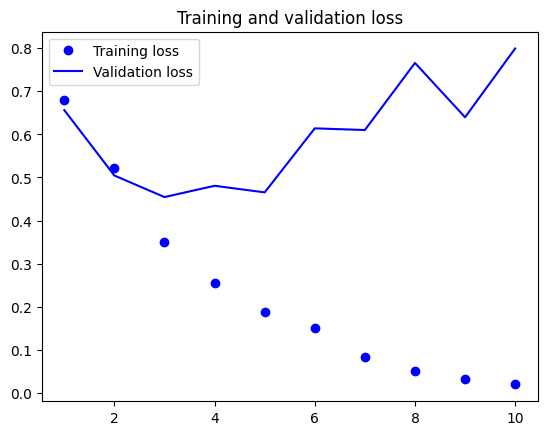

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')

plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
from keras.layers import LSTM
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train
                    , y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 57s 347ms/step - loss: 0.5896 - acc: 0.6790 - val_loss: 0.4039 - val_acc: 0.8398
Epoch 2/10
157/157 [==============================] - 54s 344ms/step - loss: 0.3463 - acc: 0.8600 - val_loss: 0.3114 - val_acc: 0.8772
Epoch 3/10
157/157 [==============================] - 53s 339ms/step - loss: 0.2654 - acc: 0.8967 - val_loss: 0.3506 - val_acc: 0.8574
Epoch 4/10
157/157 [==============================] - 54s 342ms/step - loss: 0.2248 - acc: 0.9188 - val_loss: 0.2846 - val_acc: 0.8892
Epoch 5/10
157/157 [==============================] - 55s 349ms/step - loss: 0.1967 - acc: 0.9281 - val_loss: 0.3570 - val_acc: 0.8458
Epoch 6/10
157/157 [==============================] - 59s 378ms/step - loss: 0.1768 - acc: 0.9390 - val_loss: 0.3642 - val_acc: 0.8804
Epoch 7/10
157/157 [==============================] - 58s 373ms/step - loss: 0.1619 - acc: 0.9423 - val_loss: 0.3382 - val_acc: 0.8848
Epoch 8/10
157/157 [==============================] - 5

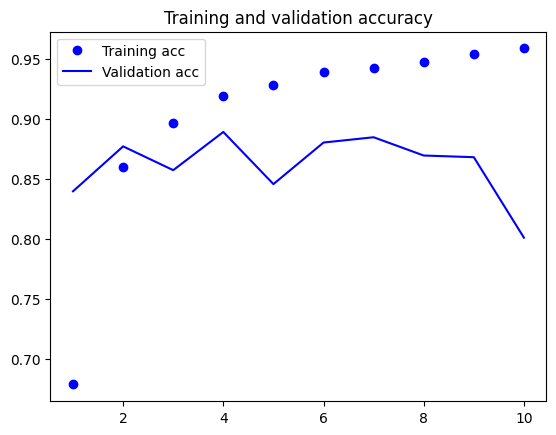

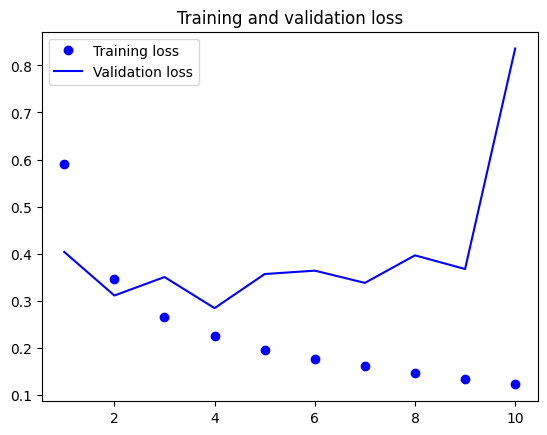

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')

plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
!mkdir jena_climate
%cd jena_climate
!wget https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
!unzip jena_climate_2009_2016.csv.zip

/content/jena_climate
--2024-05-27 15:23:38--  https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 16.182.42.40, 52.216.218.0, 54.231.137.96, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|16.182.42.40|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13565642 (13M) [application/zip]
Saving to: ‘jena_climate_2009_2016.csv.zip’

jena_climate_2009_2 100%[===================>]  12.94M  58.9MB/s    in 0.2s    

2024-05-27 15:23:38 (58.9 MB/s) - ‘jena_climate_2009_2016.csv.zip’ saved [13565642/13565642]

Archive:  jena_climate_2009_2016.csv.zip
  inflating: jena_climate_2009_2016.csv  
  inflating: __MACOSX/._jena_climate_2009_2016.csv  


In [ ]:
import os
data_dir = '/content/jena_climate'
fname = os.path.join(data_dir, 'jena_climate_2009_2016.csv')
f = open(fname)
data = f.read()
f.close()
lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:]
print(header)
print(len(lines))

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420451


In [ ]:
import numpy as np
float_data = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(',')[1:]]
    float_data[i, :] = values

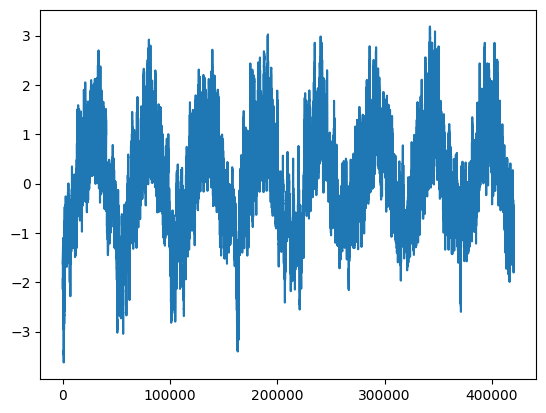

In [ ]:
from matplotlib import pyplot as plt
temp = float_data[:, 1]
plt.plot(range(len(temp)), temp)

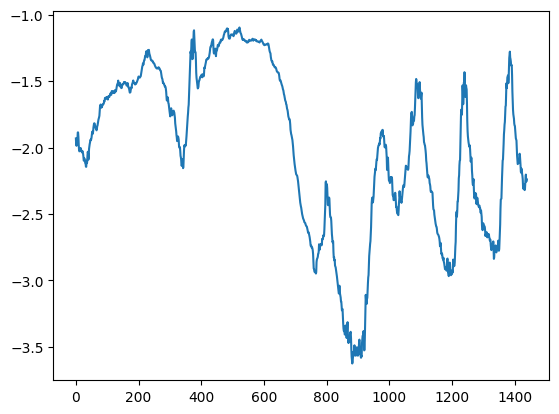

In [ ]:
plt.plot(range(1440), temp[:1440])


In [ ]:
def generator(data, lookback, delay, min_index, max_index,
            shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1

    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(
                                      min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)
        samples = np.zeros((len(rows),
                          lookback // step,
                          data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples, targets

In [ ]:
lookback = 1440
step = 6
delay = 144
batch_size = 128
train_gen = generator(float_data,
                      lookback=lookback,
                      delay=delay,
                      min_index=0,
                      max_index=200000,
                      shuffle=True,
                      step=step,
                      batch_size=batch_size)
val_gen = generator(float_data,
                    lookback=lookback,
                    delay=delay,
                    min_index=200001,
                    max_index=300000,
                    step=step,
                    batch_size=batch_size)
test_gen = generator(float_data,
                    lookback=lookback,
                    delay=delay,
                    min_index=300001,
                    max_index=None,
                    step=step,
                    batch_size=batch_size)
val_steps = (300000 - 200001 - lookback)
test_steps = (len(float_data) - 300001 - lookback)

In [ ]:
def evaluate_naive_method():
    batch_maes = []
    for step in range(val_steps):
        samples, targets = next(val_gen)
        preds = samples[:, -1, 1]
        mae = np.mean(np.abs(preds - targets))
        batch_maes.append(mae)
    print(np.mean(batch_maes))
evaluate_naive_method()

0.28969941979609765


In [ ]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
model = Sequential()
model.add(layers.Flatten(input_shape=(lookback // step, float_data.shape[-1])))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps)

Epoch 1/20


<ipython-input-26-32e924bac209>:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_gen,


500/500 [==============================] - 989s 2s/step - loss: 1.2787 - val_loss: 0.6608
Epoch 2/20
500/500 [==============================] - 906s 2s/step - loss: 0.3867 - val_loss: 0.3802
Epoch 3/20
500/500 [==============================] - ETA: 0s - loss: 0.2822

In [ ]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
#GATED RECURRENT UNIT
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
model = Sequential()
model.add(layers.GRU(32, input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps)

In [ ]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Listing 6.40 Training and evaluating a dropout-regularized GRU-based model


In [ ]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
model = Sequential()
model.add(layers.GRU(32,
          dropout=0.2,
          recurrent_dropout=0.2,
          input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=40,
                              validation_data=val_gen,
                              validation_steps=val_steps)

In [ ]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Stacking recurrent layers
Because you’re no longer overfitting but seem to have hit a performance bottleneck,
you should consider increasing the capacity of the network

Listing 6.41 Training and evaluating a dropout-regularized, stacked GRU model


In [ ]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
model = Sequential()
model.add(layers.GRU(32,
          dropout=0.1,
          recurrent_dropout=0.5,
          return_sequences=True,
          input_shape=(None, float_data.shape[-1])))
model.add(layers.GRU(64, activation='relu',
          dropout=0.1,
          recurrent_dropout=0.5))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=40,
                              validation_data=val_gen,
                              validation_steps=val_steps)

1) Because you’re still not overfitting too badly, you could safely increase the size of your layers in a quest for validation-loss improvement. This has a non-negligible computational cost, though.

2) Adding a layer didn’t help by a significant factor, so you may be
seeing diminishing returns from increasing network capacity at this point.



In [ ]:
# Listing 6.42 Training and evaluating an LSTM using reversed sequences


In [ ]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras import layers
from keras.models import Sequential
max_features = 10000
maxlen = 500
(x_train, y_train), (x_test, y_test) = imdb.load_data(
    num_words=max_features)
x_train = [x[::-1] for x in x_train]
x_test = [x[::-1] for x in x_test]
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
model = Sequential()
model.add(layers.Embedding(max_features, 128))
model.add(layers.LSTM(32))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

In [ ]:
# Listing 6.43 Training and evaluating a bidirectional LSTM


In [ ]:
model = Sequential()
model.add(layers.Embedding(max_features, 32))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Listing 6.44 Training a bidirectional GRU


In [ ]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
model = Sequential()
model.add(layers.Bidirectional(
layers.GRU(32), input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=40,
                              validation_data=val_gen,
                              validation_steps=val_steps)


### Going even further
There are many other things you could try, in order to improve performance on the
temperature-forecasting problem:
- Adjust the number of units in each recurrent layer in the stacked
setup. The current choices are largely arbitrary and thus probably suboptimal.
- Adjust the learning rate used by the RMSprop optimizer.
- Try using LSTM layers instead of GRU layers.
- Try using a bigger densely connected regressor on top of the recurrent layers:
that is, a bigger Dense layer or even a stack of Dense layers.
- Don’t forget to eventually run the best-performing models (in terms of validation MAE) on the test set! Otherwise, you’ll develop architectures that are overfitting to the validation set.

1D sequence data

In [ ]:
from keras.datasets import imdb
from keras.preprocessing import sequence
max_features = 10000
max_len = 500
print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')
print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Loading data...
17464789/17464789 [==============================] - 0s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 500)
x_test shape: (25000, 500)


In [ ]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))
model.summary()
model.compile(optimizer=RMSprop(lr=1e-4),
    loss='binary_crossentropy',
    metrics=['acc'])
history = model.fit(x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 128)          1280000   
                                                                 
 conv1d (Conv1D)             (None, 494, 32)           28704     
                                                                 
 max_pooling1d (MaxPooling1  (None, 98, 32)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 92, 32)            7200      
                                                                 
 global_max_pooling1d (Glob  (None, 32)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 1)                 3

Epoch 1/10
157/157 [==============================] - 75s 469ms/step - loss: 0.5665 - acc: 0.7152 - val_loss: 0.5020 - val_acc: 0.8180
Epoch 2/10
157/157 [==============================] - 68s 432ms/step - loss: 0.3849 - acc: 0.8737 - val_loss: 1.5933 - val_acc: 0.6832
Epoch 3/10
157/157 [==============================] - 66s 421ms/step - loss: 0.3106 - acc: 0.9083 - val_loss: 0.6470 - val_acc: 0.8450
Epoch 4/10
157/157 [==============================] - 70s 445ms/step - loss: 0.2548 - acc: 0.9288 - val_loss: 0.5137 - val_acc: 0.8712
Epoch 5/10
157/157 [==============================] - 71s 452ms/step - loss: 0.1934 - acc: 0.9548 - val_loss: 0.5683 - val_acc: 0.8668
Epoch 6/10
157/157 [==============================] - 70s 442ms/step - loss: 0.1527 - acc: 0.9709 - val_loss: 0.6331 - val_acc: 0.8734
Epoch 7/10
157/157 [==============================] - 71s 449ms/step - loss: 0.1256 - acc: 0.9812 - val_loss: 0.7694 - val_acc: 0.8670
Epoch 8/10
157/157 [==============================] - 6

In [ ]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
model = Sequential()
model.add(layers.Conv1D(32, 5, activation='relu',
    input_shape=(None, float_data.shape[-1])))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
    steps_per_epoch=500,
    epochs=20,
    validation_data=val_gen,
    validation_steps=val_steps)


NameError: name 'float_data' is not defined

In [ ]:
step = 3
lookback = 720
delay = 144
train_gen = generator(float_data,
    lookback=lookback,
    delay=delay,
    min_index=0,
    max_index=200000,
    shuffle=True,
    step=step)
val_gen = generator(float_data,
    lookback=lookback,
    delay=delay,
    min_index=200001,
    max_index=300000,
    step=step)
test_gen = generator(float_data,
    lookback=lookback,
    delay=delay,
    min_index=300001,
    max_index=None,
    step=step)
val_steps = (300000 - 200001 - lookback) // 128
test_steps = (len(float_data) - 300001 - lookback) // 128

NameError: name 'generator' is not defined

In [ ]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
model = Sequential()
model.add(layers.Conv1D(32, 5, activation='relu',
    input_shape=(None, float_data.shape[-1])))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.GRU(32, dropout=0.1, recurrent_dropout=0.5))
model.add(layers.Dense(1))
model.summary()
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
    steps_per_epoch=500,
    epochs=20,
    validation_data=val_gen,
    validation_steps=val_steps)

NameError: name 'float_data' is not defined

functional API

In [ ]:
from keras.models import Sequential, Model
from keras import layers
from keras import Input
seq_model = Sequential()
seq_model.add(layers.Dense(32, activation='relu', input_shape=(64,)))
seq_model.add(layers.Dense(32, activation='relu'))
seq_model.add(layers.Dense(10, activation='softmax'))
input_tensor = Input(shape=(64,))
x = layers.Dense(32, activation='relu')(input_tensor)
x = layers.Dense(32, activation='relu')(x)
output_tensor = layers.Dense(10, activation='softmax')(x)
model = Model(input_tensor, output_tensor)
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64)]              0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dense_6 (Dense)             (None, 10)                330       
                                                                 
Total params: 3466 (13.54 KB)
Trainable params: 3466 (13.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')
import numpy as np
x_train = np.random.random((1000, 64))
y_train = np.random.random((1000, 10))
model.fit(x_train, y_train, epochs=10, batch_size=128)
score = model.evaluate(x_train, y_train)

Epoch 1/10
8/8 [==============================] - 1s 4ms/step - loss: 11.8582
Epoch 2/10
8/8 [==============================] - 0s 4ms/step - loss: 12.4904
Epoch 3/10
8/8 [==============================] - 0s 4ms/step - loss: 13.4901
Epoch 4/10
8/8 [==============================] - 0s 4ms/step - loss: 14.9594
Epoch 5/10
8/8 [==============================] - 0s 4ms/step - loss: 17.0027
Epoch 6/10
8/8 [==============================] - 0s 4ms/step - loss: 19.6694
Epoch 7/10
8/8 [==============================] - 0s 4ms/step - loss: 22.8130
Epoch 8/10
8/8 [==============================] - 0s 4ms/step - loss: 26.5873
Epoch 9/10
8/8 [==============================] - 0s 4ms/step - loss: 30.5878
Epoch 10/10
32/32 [==============================] - 1s 2ms/step - loss: 37.5244


In [ ]:
from keras.models import Model
from keras import layers
from keras import Input
text_vocabulary_size = 10000
question_vocabulary_size = 10000
answer_vocabulary_size = 500
text_input = Input(shape=(None,), dtype='int32', name='text')
embedded_text = layers.Embedding(
    64, text_vocabulary_size)(text_input)
encoded_text = layers.LSTM(32)(embedded_text)
question_input = Input(shape=(None,),
    dtype='int32',
    name='question')
embedded_question = layers.Embedding(
    32, question_vocabulary_size)(question_input)
encoded_question = layers.LSTM(16)(embedded_question)
concatenated = layers.concatenate([encoded_text, encoded_question],
    axis=-1)
answer = layers.Dense(answer_vocabulary_size,
    activation='softmax')(concatenated)
model = Model([text_input, question_input], answer)
model.compile(optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['acc'])

In [ ]:
from keras import layers
from keras import Input
from keras.models import Model
vocabulary_size = 50000
num_income_groups = 10
posts_input = Input(shape=(None,), dtype='int32', name='posts')
embedded_posts = layers.Embedding(256, vocabulary_size)(posts_input)
x = layers.Conv1D(128, 5, activation='relu')(embedded_posts)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(256, 5, activation='relu')(x)
x = layers.Conv1D(256, 5, activation='relu')(x)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(256, 5, activation='relu')(x)
x = layers.Conv1D(256, 5, activation='relu')(x)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dense(128, activation='relu')(x)
age_prediction = layers.Dense(1, name='age')(x)
income_prediction = layers.Dense(num_income_groups,
    activation='softmax',
    name='income')(x)
gender_prediction = layers.Dense(1, activation='sigmoid', name='gender')(x)
model = Model(posts_input,
    [age_prediction, income_prediction, gender_prediction])

In [ ]:
model.compile(optimizer='rmsprop',
    loss=['mse', 'categorical_crossentropy', 'binary_crossentropy'])
model.compile(optimizer='rmsprop',
    loss={'age': 'mse',
    'income': 'categorical_crossentropy',
    'gender': 'binary_crossentropy'})

In [ ]:
model.compile(optimizer='rmsprop',
    loss=['mse', 'categorical_crossentropy', 'binary_crossentropy'],
    loss_weights=[0.25, 1., 10.])
model.compile(optimizer='rmsprop',
    loss={'age': 'mse',
        'income': 'categorical_crossentropy',
        'gender': 'binary_crossentropy'},
    loss_weights={'age': 0.25,
        'income': 1.,
        'gender': 10.})

In [ ]:
model.fit(posts, [age_targets, income_targets, gender_targets],
    epochs=10, batch_size=64)
model.fit(posts, {'age': age_targets,
    'income': income_targets,
    'gender': gender_targets},
    epochs=10, batch_size=64)

NameError: name 'posts' is not defined

In [ ]:
import keras
from keras import layers
from keras.datasets import imdb
from keras.preprocessing import sequence
max_features = 2000
max_len = 500
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)
model = keras.models.Sequential()
model.add(layers.Embedding(max_features, 128,
    input_length=max_len,
    name='embed'))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))
model.summary()
model.compile(optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['acc'])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embed (Embedding)           (None, 500, 128)          256000    
                                                                 
 conv1d_7 (Conv1D)           (None, 494, 32)           28704     
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 98, 32)            0         
 g1D)                                                            
                                                                 
 conv1d_8 (Conv1D)           (None, 92, 32)            7200      
                                                                 
 global_max_pooling1d_2 (Gl  (None, 32)                0         
 obalMaxPooling1D)                                               
                                                                 
 dense_11 (Dense)            (None, 1)                

In [ ]:
!mkdir my_log_dir
callbacks = [
    keras.callbacks.TensorBoard(
    log_dir='my_log_dir',
    histogram_freq=1,
    embeddings_freq=1,
    )
    ]
history = model.fit(x_train, y_train,
    epochs=20,
    batch_size=128,
    validation_split=0.2,
    callbacks=callbacks)

Epoch 1/20
157/157 [==============================] - 68s 429ms/step - loss: 7.7364 - acc: 0.4985 - val_loss: 7.6168 - val_acc: 0.5062
Epoch 2/20
157/157 [==============================] - 64s 411ms/step - loss: 7.7364 - acc: 0.4985 - val_loss: 7.6168 - val_acc: 0.5062
Epoch 3/20
157/157 [==============================] - 69s 439ms/step - loss: 7.7364 - acc: 0.4985 - val_loss: 7.6168 - val_acc: 0.5062
Epoch 4/20
157/157 [==============================] - 73s 465ms/step - loss: 7.7364 - acc: 0.4985 - val_loss: 7.6168 - val_acc: 0.5062
Epoch 5/20
157/157 [==============================] - 67s 425ms/step - loss: 7.7364 - acc: 0.4985 - val_loss: 7.6168 - val_acc: 0.5062
Epoch 6/20
157/157 [==============================] - 68s 435ms/step - loss: 7.7364 - acc: 0.4985 - val_loss: 7.6168 - val_acc: 0.5062
Epoch 7/20
157/157 [==============================] - 66s 419ms/step - loss: 7.7364 - acc: 0.4985 - val_loss: 7.6168 - val_acc: 0.5062
Epoch 8/20
157/157 [==============================] - 6

In [ ]:
!tensorboard --logdir=my_log_dir

2024-06-03 13:32:04.013113: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-03 13:32:04.013240: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-03 13:32:04.017520: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-03 13:32:05.553124: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Serving TensorBoard on localhost; to expose to 

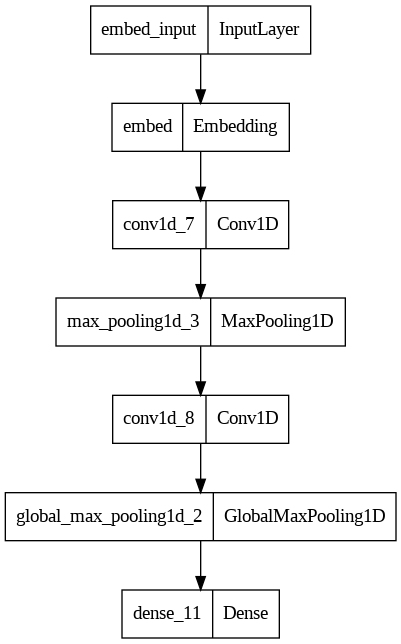

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')


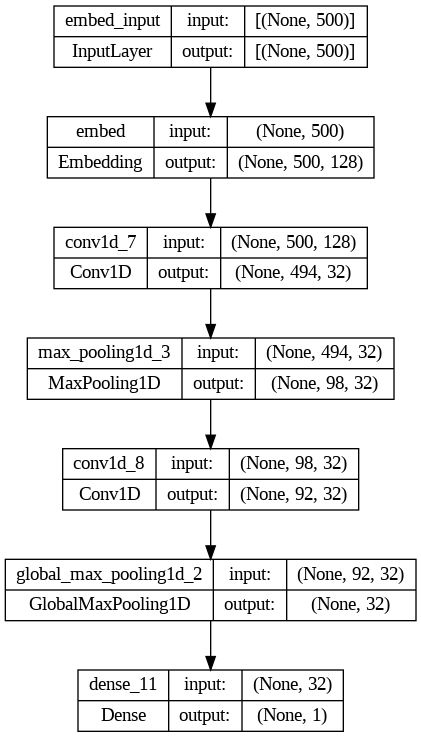

In [ ]:
from keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='model.png')

callbacks

In [ ]:
# keras.callbacks.ModelCheckpoint
# keras.callbacks.EarlyStopping
# keras.callbacks.LearningRateScheduler
# keras.callbacks.ReduceLROnPlateau
# keras.callbacks.CSVLogger

import keras
callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor='acc',
        patience=1,
        ),
    keras.callbacks.ModelCheckpoint(
        filepath='my_model.h5',
        monitor='val_loss',
        save_best_only=True,
        )
    ]
model.compile(optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['acc'])
model.fit(x, y,
    epochs=10,
    batch_size=32,
    callbacks=callbacks_list,
    validation_data=(x_val, y_val))

NameError: name 'model' is not defined

tensorboard

In [ ]:
import keras
from keras import layers
from keras.datasets import imdb
from keras.preprocessing import sequence
max_features = 2000
max_len = 500
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)
model = keras.models.Sequential()
model.add(layers.Embedding(max_features, 128,
    input_length=max_len,
    name='embed'))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))
model.summary()
model.compile(optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['acc'])

17464789/17464789 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embed (Embedding)           (None, 500, 128)          256000    
                                                                 
 conv1d (Conv1D)             (None, 494, 32)           28704     
                                                                 
 max_pooling1d (MaxPooling1  (None, 98, 32)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 92, 32)            7200      
                                                                 
 global_max_pooling1d (Glob  (None, 32)                0         
 alMaxPooling1D)                                                 
                                                         

In [ ]:
mkdir my_log_dir


In [ ]:
callbacks = [
    keras.callbacks.TensorBoard(
        log_dir='my_log_dir',
        histogram_freq=1,
        embeddings_freq=1,
        )
    ]
history = model.fit(x_train, y_train,
    epochs=20,
    batch_size=128,
    validation_split=0.2,
    callbacks=callbacks)

Epoch 1/20
157/157 [==============================] - 77s 480ms/step - loss: 7.7364 - acc: 0.4985 - val_loss: 7.6168 - val_acc: 0.5062
Epoch 2/20
157/157 [==============================] - 75s 475ms/step - loss: 7.7364 - acc: 0.4985 - val_loss: 7.6168 - val_acc: 0.5062
Epoch 3/20
157/157 [==============================] - 75s 478ms/step - loss: 7.7364 - acc: 0.4985 - val_loss: 7.6168 - val_acc: 0.5062
Epoch 4/20
157/157 [==============================] - 74s 469ms/step - loss: 7.7364 - acc: 0.4985 - val_loss: 7.6168 - val_acc: 0.5062
Epoch 5/20
157/157 [==============================] - 74s 471ms/step - loss: 7.7364 - acc: 0.4985 - val_loss: 7.6168 - val_acc: 0.5062
Epoch 6/20
157/157 [==============================] - 75s 474ms/step - loss: 7.7364 - acc: 0.4985 - val_loss: 7.6168 - val_acc: 0.5062
Epoch 7/20
157/157 [==============================] - 75s 478ms/step - loss: 7.7364 - acc: 0.4985 - val_loss: 7.6168 - val_acc: 0.5062
Epoch 8/20
157/157 [==============================] - 7

In [ ]:
!tensorboard --logdir=my_log_dir --load_fast=false

2024-06-04 07:09:50.707222: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-04 07:09:50.707301: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-04 07:09:50.709715: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-04 07:09:52.491400: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.15.2 at http://localhost:6006/ (Press CTRL+C to quit)


generative deep learning
- next character prediction

In [ ]:
import keras
import numpy as np
path = keras.utils.get_file(
'nietzsche.txt',
origin='https://s3.amazonaws.com/text-datasets/nietzsche.txt')
text = open(path).read().lower()
print('Corpus length:', len(text))

600901/600901 [==============================] - 0s 0us/step
Corpus length: 600893


In [ ]:
import keras
import numpy as np

path = keras.utils.get_file(
    'nietzsche.txt',
    origin='https://s3.amazonaws.com/text-datasets/nietzsche.txt')
text = open(path).read().lower()
print('Corpus length:', len(text))

maxlen = 60
step = 3
sentences = []
next_chars = []
for i in range(0, len(text) - maxlen, step):
    sentences.append(text[i: i + maxlen])
    next_chars.append(text[i + maxlen])
print('Number of sequences:', len(sentences))
chars = sorted(list(set(text)))
print('Unique characters:', len(chars))
char_indices = dict((char, chars.index(char)) for char in chars)
print('Vectorization...')
x = np.zeros((len(sentences), maxlen, len(chars)), dtype=bool)
y = np.zeros((len(sentences), len(chars)), dtype=bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_indices[char]] = 1
        y[i, char_indices[next_chars[i]]] = 1

Corpus length: 600893
Number of sequences: 200278
Unique characters: 57
Vectorization...


In [ ]:
from keras import layers
model = keras.models.Sequential()
model.add(layers.LSTM(128, input_shape=(maxlen, len(chars))))
model.add(layers.Dense(len(chars), activation='softmax'))

In [ ]:
optimizer = keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)

In [ ]:
def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

In [ ]:
import random
import sys
for epoch in range(1, 60):
    print('epoch', epoch)
    model.fit(x, y, batch_size=128, epochs=1)
    start_index = random.randint(0, len(text) - maxlen - 1)
    generated_text = text[start_index: start_index + maxlen]
    print('--- Generating with seed: "' + generated_text + '"')
    for temperature in [0.2, 0.5, 1.0, 1.2]:
        print('------ temperature:', temperature)
        sys.stdout.write(generated_text)
    for i in range(400):
        sampled = np.zeros((1, maxlen, len(chars)))
        for t, char in enumerate(generated_text):
            sampled[0, t, char_indices[char]] = 1.
        preds = model.predict(sampled, verbose=0)[0]
        next_index = sample(preds, temperature)
        next_char = chars[next_index]
        generated_text += next_char
        generated_text = generated_text[1:]
        sys.stdout.write(next_char)

epoch 1
1565/1565 [==============================] - 293s 186ms/step - loss: 2.0390
--- Generating with seed: " period
the pre-moral period of mankind; the imperative, "kn"
------ temperature: 0.2
 period
the pre-moral period of mankind; the imperative, "kn------ temperature: 0.5
 period
the pre-moral period of mankind; the imperative, "kn------ temperature: 1.0
 period
the pre-moral period of mankind; the imperative, "kn------ temperature: 1.2
 period
the pre-moral period of mankind; the imperative, "know the trofuring inwuntebonselate musicizy, the lect, evid:" was staith!ss of
(ofviences! unigen
ezhisotause of
posiouses; oppenenss of peringenrecate in the sentiating not by has, to belemed willde what, scioned, voive of move with my nelles, the benk opes of a striblely; a devatagey. withhs arboote weluturariss, ore oligho:e: yobke woild a
daygess may overy
dhy tritged1y) has as the has
abso jnaepoch 2
1565/1565 [==============================] - 296s 189ms/step - loss: 1.6519
--- Gen

KeyboardInterrupt: 

deepdream image gen

In [ ]:
# Loading the pretrained Inception V3 model
from keras.applications import inception_v3
from keras import backend as K
K.set_learning_phase(0)
model = inception_v3.InceptionV3(weights='imagenet',
    include_top=False)

layer_contributions = {
'mixed2': 0.2,
'mixed3': 3.,
'mixed4': 2.,
'mixed5': 1.5,
}

layer_dict = dict([(layer.name, layer) for layer in model.layers])
loss = K.variable(0.)
for layer_name in layer_contributions:
    coeff = layer_contributions[layer_name]
    activation = layer_dict[layer_name].output
    scaling = K.prod(K.cast(K.shape(activation), 'float32'))
    loss += coeff * K.sum(K.square(activation[:, 2: -2, 2: -2, :])) / scaling

dream = model.input
grads = K.gradients(loss, dream)[0]
grads /= K.maximum(K.mean(K.abs(grads)), 1e-7)
outputs = [loss, grads]
fetch_loss_and_grads = K.function([dream], outputs)
def eval_loss_and_grads(x):
    outs = fetch_loss_and_grads([x])
    loss_value = outs[0]
    grad_values = outs[1]
    return loss_value, grad_values
def gradient_ascent(x, iterations, step, max_loss=None):
    for i in range(iterations):
        loss_value, grad_values = eval_loss_and_grads(x)
        if max_loss is not None and loss_value > max_loss:
            break
        print('...Loss value at', i, ':', loss_value)
        x += step * grad_values
    return x

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:452: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


TypeError: You are passing KerasTensor(type_spec=TensorSpec(shape=(None, None, None, 288), dtype=tf.float32, name=None), name='tf.__operators__.getitem_2/strided_slice:0', description="created by layer 'tf.__operators__.getitem_2'"), an intermediate Keras symbolic input/output, to a TF API that does not allow registering custom dispatchers, such as `tf.cond`, `tf.function`, gradient tapes, or `tf.map_fn`. Keras Functional model construction only supports TF API calls that *do* support dispatching, such as `tf.math.add` or `tf.reshape`. Other APIs cannot be called directly on symbolic Kerasinputs/outputs. You can work around this limitation by putting the operation in a custom Keras layer `call` and calling that layer on this symbolic input/output.

In [ ]:
!pip install preprocess

In [ ]:
import numpy as np
from keras.preprocessing import image
import preprocess
step = 0.01
num_octave = 3
octave_scale = 1.4
iterations = 20
max_loss = 10.
base_image_path = '/content/images.jpeg'
img = preprocess(base_image_path)

original_shape = img.shape[1:3]
successive_shapes = [original_shape]
for i in range(1, num_octave):
    shape = tuple([int(dim / (octave_scale ** i))
        for dim in original_shape])
    successive_shapes.append(shape)
successive_shapes = successive_shapes[::-1]
original_img = np.copy(img)
shrunk_original_img = resize_img(img, successive_shapes[0])

for shape in successive_shapes:
    print('Processing image shape', shape)
    img = resize_img(img, shape)
    img = gradient_ascent(img,
        iterations=iterations,
        step=step,
        max_loss=max_loss)
    upscaled_shrunk_original_img = resize_img(shrunk_original_img, shape)
    same_size_original = resize_img(original_img, shape)
    lost_detail = same_size_original - upscaled_shrunk_original_img
    img += lost_detail
    shrunk_original_img = resize_img(original_img, shape)
    save_img(img, fname='dream_at_scale_' + str(shape) + '.png')

save_img(img, fname='final_dream.png')



AttributeError: 'str' object has no attribute 'shape'

In [ ]:
#auxilary function
import scipy
from keras.preprocessing import image
def resize_img(img, size):
    img = np.copy(img)
    factors = (1,
        float(size[0]) / img.shape[1],
        float(size[1]) / img.shape[2],
        1)
    return scipy.ndimage.zoom(img, factors, order=1)
def save_img(img, fname):
    pil_img = deprocess_image(np.copy(img))
    scipy.misc.imsave(fname, pil_img)
def preprocess_image(image_path):
    img = image.load_img(image_path)
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = inception_v3.preprocess_input(img)
    return img
def deprocess_image(x):
    if K.image_data_format() == 'channels_first':
        x = x.reshape((3, x.shape[2], x.shape[3]))
        x = x.transpose((1, 2, 0))
    else:
        x = x.reshape((x.shape[1], x.shape[2], 3))
    x /= 2.
    x += 0.5
    x *= 255.
    x = np.clip(x, 0, 255).astype('uint8')
    return x

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
target_image_path = '/content/images.jpeg'
style_reference_image_path = '/content/cat.jpg'
width, height = load_img(target_image_path).size
img_height = 400
img_width = int(width * img_height / height)

In [ ]:
import numpy as np
from keras.applications import vgg19
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(img_height, img_width))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = vgg19.preprocess_input(img)
    return img
def deprocess_image(x):
    x[:, :, 0] += 103.939
    x[:, :, 1] += 116.779
    x[:, :, 2] += 123.68
    x = x[:, :, ::-1]
    x = np.clip(x, 0, 255).astype('uint8')
    return x

In [ ]:
from keras import backend as K
target_image = K.constant(preprocess_image(target_image_path))
style_reference_image = K.constant(preprocess_image(style_reference_image_path))
combination_image = K.placeholder((1, img_height, img_width, 3))
input_tensor = K.concatenate([target_image,
    style_reference_image,
    combination_image], axis=0)
model = vgg19.VGG19(input_tensor=input_tensor,
    weights='imagenet',
    include_top=False)
print('Model loaded.')

#content loss
def content_loss(base, combination):
    return K.sum(K.square(combination - base))

# Listing 8.18 Style loss
def gram_matrix(x):
    features = K.batch_flatten(K.permute_dimensions(x, (2, 0, 1)))
    gram = K.dot(features, K.transpose(features))
    return gram
def style_loss(style, combination):
    S = gram_matrix(style)
    C = gram_matrix(combination)
    channels = 3
    size = img_height * img_width
    return K.sum(K.square(S - C)) / (4. * (channels ** 2) * (size ** 2))

Model loaded.


In [ ]:
# total variation loss

def total_variation_loss(x):
    a = K.square(
        x[:, :img_height - 1, :img_width - 1, :] -
        x[:, 1:, :img_width - 1, :])
    b = K.square(
        x[:, :img_height - 1, :img_width - 1, :] -
        x[:, :img_height - 1, 1:, :])
    return K.sum(K.pow(a + b, 1.25))

outputs_dict = dict([(layer.name, layer.output) for layer in model.layers])
content_layer = 'block5_conv2'
style_layers = ['block1_conv1',
    'block2_conv1',
    'block3_conv1',
    'block4_conv1',
    'block5_conv1']
total_variation_weight = 1e-4
style_weight = 1.
content_weight = 0.025

loss = K.variable(0.)
layer_features = outputs_dict[content_layer]
target_image_features = layer_features[0, :, :, :]
combination_features = layer_features[2, :, :, :]
loss += content_weight * content_loss(target_image_features,
    combination_features)
for layer_name in style_layers:
    layer_features = outputs_dict[layer_name]
    style_reference_features = layer_features[1, :, :, :]
    combination_features = layer_features[2, :, :, :]
    sl = style_loss(style_reference_features, combination_features)
    loss += (style_weight / len(style_layers)) * sl
loss += total_variation_weight * total_variation_loss(combination_image)



#GRADIENT DECENT LOSS
grads = K.gradients(loss, combination_image)[0]
fetch_loss_and_grads = K.function([combination_image], [loss, grads])
class Evaluator(object):
def __init__(self):
    self.loss_value = None
    self.grads_values = None
def loss(self, x):
    assert self.loss_value is None
    x = x.reshape((1, img_height, img_width, 3))
    outs = fetch_loss_and_grads([x])

RuntimeError: `variable += value` with `tf.Variable`s is not supported. Use `variable.assign_add(value)` to modify the variable, or `out = variable + value` if you need to get a new output Tensor.